#PENGENALAN KECERDASAN BUATAN
##TUGAS 1 : SEARCHING
NAMA   : ALMANIK BALINGGA  </br>
NIM    : 1301184253

####LIBRARY

In [1]:
#import library
import numpy as np

###FUNGSI

####FUNGSI UTAMA

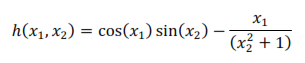

In [2]:
def fungsi(x1,x2):
  #mengembalikan hasil dari fungsi yang akan dicari nilai minimumnya
  return np.cos(x1)*np.sin(x2)-(x1/(pow(x2,2)+1))

####KROMOSOM

In [3]:
def kromosom(length):
  #membuat kromosom sesuai panjang yang ditentukan di main program
  krom =[]
  for i in range(length):
    krom.append(np.random.randint(0,9))
  return krom

####POPULASI

In [4]:
def populasi(num,length):
  #untuk menciptakan populasi (membangkitkan sebanyak num individu, dengan tiap individu memiliki panjang kromosom sepanjang length)  
  ppls=[]
  for i in range(num):
    ppls.append(kromosom(length))
  return ppls 


####NILAI X

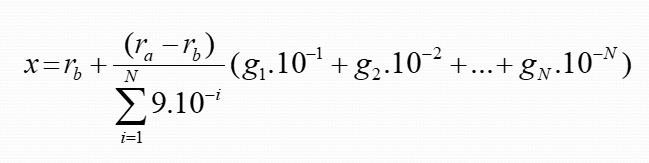

#####SIGMA  9.10^-i  dimana  i=1 -> i=N

In [5]:
def sigma910(panjang):
  #mengembalikan nilai sigma (pembagi ra-rb)
  final = 0
  i = -1
  for j in range(panjang):
    final += 9*(10**i)
    i-=1
  return final

#####(g1.10^-1 . g2.10^-2 ... gN.10^-N)


In [6]:
def gXdecimal(kromosom,x):
  #mengembalikan nilai pengali ra-rb
  final = 0 
  i = -1
  countarray = 0
  for j in range(x):
    final += kromosom[countarray]*(10**i)
    i-=1
    countarray+=1
  return final

#####NILAI X

In [7]:
def fenotip(x,max,min):
  #untuk mendekode kromosom dan mencari 1 nilai x
  y = len(x)
  x_fenotip = min + (((max-min)*gXdecimal(x,y))/sigma910(y))
  return x_fenotip

####PECAH X

In [8]:
def pecahX(kromosom):
  #untuk membagi dua kromosom (x1 dan x2)
  a = len(kromosom)//2
  return kromosom[:a], kromosom[a:]

####DEKODE KROMOSOM

In [83]:
def dekromosom(kromosom):
  #untuk dekode kromosom dan mengembalikan 2 nilai x (x1 dan x2)
  x1,x2 = pecahX(kromosom)
  x1 = fenotip(x1, 2, -1)
  x2 = fenotip(x2, 1, -1)
  return x1,x2

####PILIH ORANGTUA

In [143]:
def pilihorangtua(populasi,fitnes,totalFitnes):
  #fungsi untuk memilih orang tua dari populasi
  r = np.random.random()
  parents=[]
  #pilih 2 orang tua
  for j in range(2):
    ortu = RouletteWheel(populasi,fitnes,totalFitnes)
    parents.append(ortu)
  #selanjutnya adalah menyeleksi jika orang tua yang terpilih adalah orangtua yang sama
  # KAMI TIDAK MENERIMA GAY
  while (parents[0] == parents[1]):
    parents.pop()
    ortu = RouletteWheel(populasi,fitnes,totalFitnes)
    parents.append(ortu)
  return parents

####ROULETTE WHEEL

In [11]:
def RouletteWheel(populasi,fitnes,totalFitnes):
  #untuk memilih 1 orangtua dengan roulettewheel
  r = np.random.random()
  count = 0
  while (r>0):
    #pendekatan roulettewheel dengan mengurangi angka random dengan 
    #proporsi fitness dari tiap individu yang di loop sampai nilai random menjadi < 0 
    r -= fitnes[count]/totalFitnes
    #print(r)
    count += 1
    if (count == (len(populasi)-1)): #terminasi jika terjadi kondisi  
      break
  return populasi[count]

####FITNESS

In [150]:
def fitness(x1,x2):
  return 1-(fungsi(x1,x2))
  #return 1/(fungsi(x1,x2)+0.9)
  #return 1/fungsi(x1,x2)

####MUTASI

In [160]:
def mutasi(anak1,anak2):
  hasilmutasi = []
  hit_mutasi = np.random.random()
  #probabilitas mutasi = 10%
  #ANAK PERTAMA
  if hit_mutasi< 0.1:
    point = np.random.randint(0,len(anak1)-1)
    anak1[point] = np.random.randint(0,9)
  hasilmutasi.append(anak1)
  # =======================================
  hit_mutasi = np.random.random()
  #ANAK KEDUA
  if hit_mutasi< 0.1:
    point = np.random.randint(0,len(anak2)-1)
    anak2[point] = np.random.randint(0,9)
  hasilmutasi.append(anak2)
  return hasilmutasi

####PERSILANGAN (DITAMBAHKAN EVALUASI)


In [14]:
def persilangan2(parent1, parent2):
  #one point crossover
  kawin1,kawin2 = [],[]
  generasiBaru=[]
  crosProb = np.random.random()
  #probabilitas orang tua untuk melakuakn crossover adalah 95%
  if crosProb <0.95 :
    n = np.random.randint(1,len(parent1)-1)
    kawin1[:n] = parent1[:n]
    kawin1[n:] = parent2[n:]
    kawin2[:n] = parent2[:n]
    kawin2[n:] = parent1[n:]
    #Langsung lakukan mutasi
    mutasinya = mutasi(kawin1,kawin2)
    #gabungkan anak dan orang tua dalam satu rumah
    mutasinya.append(parent1)
    mutasinya.append(parent2)
    fitAll=[]
    #========== .feast - EVALUASI.mp3 ===========
    #cari fitness semua anggota keluarga
    for i in range(len(mutasinya)):
      x1,x2 = dekromosom(mutasinya[i])
      fit= fitness(x1,x2)
      # print(fit)
      fitAll.append(fit)
    #urutkan dari yang paling besar
    fitAll.sort(reverse=True)
    #BUNUH INDIVIDU YANG PALING CUPU FITNESSNYA
    fitAll.pop()
    fitAll.pop()
    # print(fitAll)
    #CARI SIAPA NAMA INDIVIDU YANG FITNESSNYA TERBAIKH
    for i in range(len(mutasinya)):
      x1,x2 = dekromosom(mutasinya[i])
      fit = fitness(x1,x2)
      # print(fit)
      #MASUKKAN KE DAFTAR PEMENANG
      if fit in fitAll:
        generasiBaru.append(mutasinya[i])
  else:
    generasiBaru.append(parent1)
    generasiBaru.append(parent2)

  return generasiBaru

####KROMOSOM TERBAIK

In [15]:
def theBattleGround(soldiers):
  #inisiasi max paling kecil
  max = -9999
  for i in range(len(soldiers)):
    a, b = dekromosom(soldiers[i])
    f = fungsi(a,b)
    fit = fitness(a,b)
    if (fit>max):
      max = fit
      thesoldiers = soldiers[i]
  return thesoldiers

###PROGRAM UTAMA

####ALUR PROGRAM


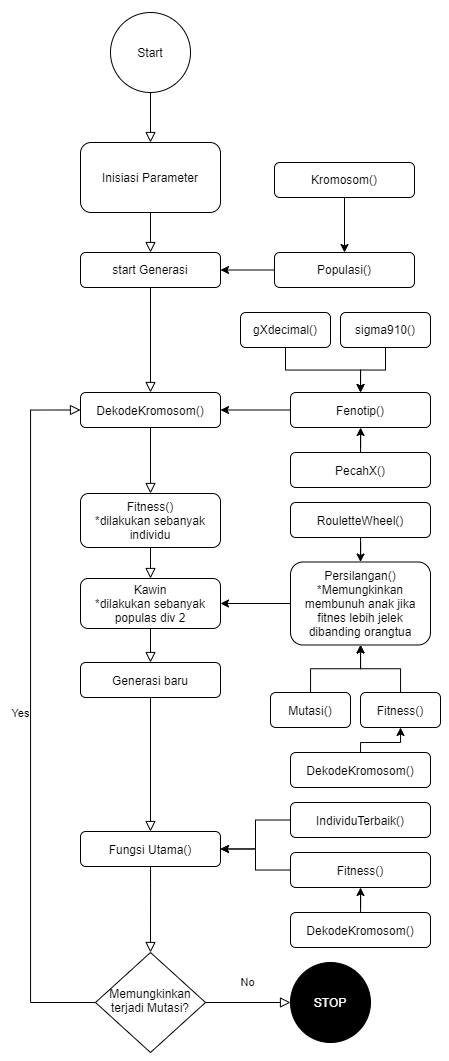

####PROGRAM UTAMA

In [161]:
# inisiasi parameter
#jumlah individu dalam satu populasi
pop = 100
#panjang kromosom
corn = 6
#jumlah evolusi
iterasi = 10
#inisiasi variable
populasis = []
newBest=[]
#membangkitkan popuasi
populasis = populasi(pop,corn)
#memulai evolusi
for i in range(iterasi):
  #menampilkan populasi awal dan akhir
  if i == 0 or i == iterasi-1:
    print("Generasi ke = ",i+1) 
    print(populasis)
    print(" ")
  #inisiasi variable yang digunakan saat looping
  regenerasi =[]
  fitnes = []
  totalfit = 0

  #memproses tiap individu yang ada dalam populasi
  for j in range(len(populasis)):
    x1,x2 = dekromosom(populasis[j])
    # print("X1 = ",x1)
    # print("X2 = ",x2)
    fitnes.append(fitness(x1,x2))
    # print("Nilai Fungsi = ",mainf)
    # print("Fitness = ",fitnes[i])
    totalfit +=fitnes[j]
  
  #memulai perkawinan  
  for j in range(len(populasis)//2):
    ortu = pilihorangtua(populasis,fitnes,totalfit)
    #print("Orang Tua = ",ortu[0]," dan ",ortu[1])
    anak = persilangan2(ortu[0],ortu[1])
    #print("Anggota Keluarga terpilih = ",anak[0]," dan ",anak[1])
    regenerasi.append(anak[0])
    regenerasi.append(anak[1])
  
  #menyimpan individu terbaik dalam satu generasi dari semua populasi
  newBest = theBattleGround(regenerasi)
  populasis = regenerasi

#hasil akhir
print("")  
for k in range(len(populasis)):
  print(k," = ",populasis[k])
print("===============Pemenang======================")
print(newBest)
a, b = dekromosom(newBest)
print("X1 = ",a," X2 = ",b)
print("Nilai Fungsi = ",fungsi(a,b))
print("Fitness = ",fitness(x1,x2))

Generasi ke =  1
[[8, 0, 5, 4, 3, 7], [8, 2, 2, 3, 5, 5], [3, 8, 7, 5, 5, 2], [8, 0, 2, 1, 6, 2], [7, 7, 5, 2, 1, 8], [8, 4, 4, 1, 7, 7], [1, 2, 8, 7, 2, 2], [0, 0, 7, 0, 6, 7], [4, 6, 5, 3, 2, 7], [4, 4, 4, 0, 0, 1], [4, 4, 2, 5, 5, 6], [0, 2, 0, 2, 3, 3], [8, 5, 0, 5, 4, 4], [6, 2, 1, 5, 2, 1], [2, 2, 4, 8, 1, 3], [6, 7, 1, 7, 2, 2], [1, 2, 3, 7, 4, 6], [3, 0, 0, 1, 1, 8], [1, 5, 7, 3, 5, 8], [2, 2, 8, 4, 2, 1], [1, 5, 0, 2, 6, 2], [1, 3, 7, 7, 8, 0], [4, 5, 5, 2, 7, 7], [1, 1, 5, 6, 1, 1], [3, 4, 5, 5, 8, 5], [8, 6, 1, 7, 7, 7], [6, 4, 2, 1, 8, 4], [5, 2, 0, 3, 3, 6], [4, 1, 2, 6, 7, 6], [7, 3, 4, 4, 1, 6], [6, 6, 0, 0, 8, 1], [3, 0, 3, 6, 7, 5], [7, 8, 3, 6, 7, 1], [5, 7, 0, 1, 7, 8], [5, 4, 4, 0, 6, 5], [0, 7, 7, 1, 5, 0], [8, 6, 2, 3, 4, 1], [3, 1, 6, 6, 1, 6], [6, 1, 1, 3, 6, 0], [7, 3, 2, 4, 3, 2], [5, 6, 3, 4, 4, 1], [4, 3, 6, 8, 0, 1], [6, 8, 6, 7, 4, 2], [8, 8, 5, 8, 8, 1], [0, 6, 8, 5, 8, 4], [3, 7, 7, 4, 0, 5], [7, 6, 5, 5, 7, 1], [7, 5, 5, 6, 6, 5], [6, 6, 0, 0, 4, 7], [3